In [1]:
%matplotlib inline
from datascience import *
import numpy as np
from scipy import stats  
import matplotlib.pyplot as plt

In [2]:
building_energy = Table.read_table('data/building_energy.csv')

In [3]:
building_energy

State,Count,Mean,Standard Deviation,0 Percentile,25th Percentile,50th Percentile,75th Percentile,100th Percentile
Summary,84211,276.998,279.419,1.4,116.358,184.491,311.909,3138.79
AK,94,264.859,186.863,43.488,144.939,218.643,293.993,886.298
AL,815,355.021,368.845,10.58,132.554,244.419,356.429,2440.14
AR,457,341.971,291.714,7.06,143.44,282.64,389.101,2442.54
AZ,1376,246.609,193.929,5.443,125.648,186.585,330.157,2317.32
CA,12175,297.294,362.892,1.871,88.864,149.47,305.454,3118.29
CO,2423,240.483,246.625,2.57,98.892,154.615,267.864,2518.52
CT,562,269.092,249.136,15.7,118.11,169.197,306.663,1974.03
DC,1498,210.315,134.479,5.231,150.454,190.224,234.09,2058.77
DE,486,227.511,177.719,5.197,121.605,181.631,283.097,1736.27


In [4]:
def conf_interval(s_std, n, s_mean, alpha=0.05):
    #works if population size is much larger than the sample size
    tstar = stats.t.ppf(1-alpha/2, n-1)
    std_error = s_std/np.sqrt(n)
    lower = s_mean-std_error
    upper = s_mean+std_error
#     return lower, upper
    return std_error

building_energy['SE']=building_energy.apply(lambda std, n, mu: conf_interval(std, n, mu), 
                      ['Standard Deviation', 'Count', 'Mean'])

In [5]:
building_energy

State,Count,Mean,Standard Deviation,0 Percentile,25th Percentile,50th Percentile,75th Percentile,100th Percentile,SE
Summary,84211,276.998,279.419,1.4,116.358,184.491,311.909,3138.79,0.962879
AK,94,264.859,186.863,43.488,144.939,218.643,293.993,886.298,19.2734
AL,815,355.021,368.845,10.58,132.554,244.419,356.429,2440.14,12.9201
AR,457,341.971,291.714,7.06,143.44,282.64,389.101,2442.54,13.6458
AZ,1376,246.609,193.929,5.443,125.648,186.585,330.157,2317.32,5.22798
CA,12175,297.294,362.892,1.871,88.864,149.47,305.454,3118.29,3.28884
CO,2423,240.483,246.625,2.57,98.892,154.615,267.864,2518.52,5.01026
CT,562,269.092,249.136,15.7,118.11,169.197,306.663,1974.03,10.5092
DC,1498,210.315,134.479,5.231,150.454,190.224,234.09,2058.77,3.47455
DE,486,227.511,177.719,5.197,121.605,181.631,283.097,1736.27,8.0615


/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


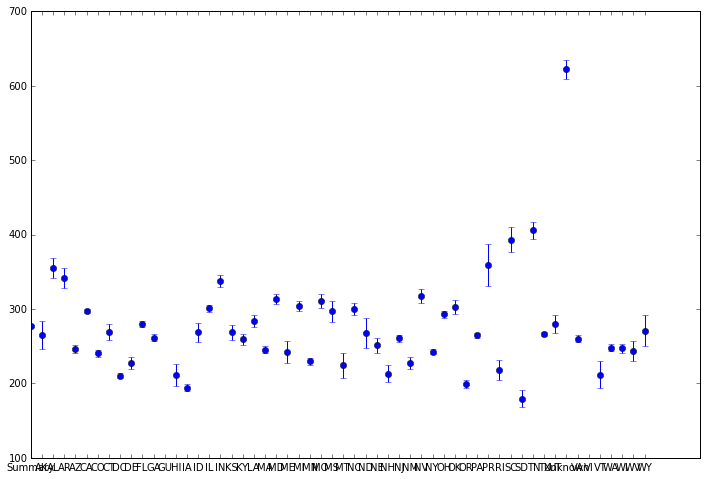

In [6]:
# plt.plot(building_energy['Mean'], '.')

fig, ax = plt.subplots()
fig.set_size_inches(12,8)
ax.errorbar(range(len(building_energy['State'])),building_energy['Mean'], 
             yerr = building_energy['SE'], fmt='o')

# plt.plot(building_energy['Mean'], '.', yerr = building_energy['SE'])

ax.set_xticks(range(len(building_energy['State'])))
ax.set_xticklabels(building_energy['State'])

